<a href="https://colab.research.google.com/github/a-forty-two/cylons/blob/master/05_Detecting_Edges.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#  1  1  1   -> EXTRACT right END of image ->   subtract 1 1 0 -> 0 0  1 -> 0 0 1
#  1  0  1                                               1 1 0    0 -1 1    0 0 1
#  1  1  1                                               1 1 0    0 0  1    0 0 1

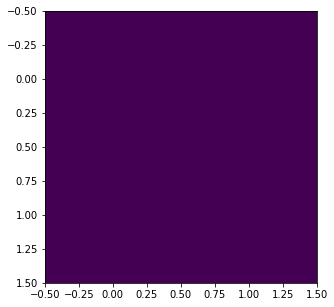

In [9]:
# let's play around with dummy images
import numpy as np
import matplotlib.pyplot as plt
#from google.colab.patches import cv2_imshow
# 3 dummy images  -> 2 dimensional arrays of numbers 
i1 = np.array([np.array([200,200]), np.array([200,200])])
i2 = np.array([np.array([200,200]), np.array([0,0])])
i3 = np.array([np.array([200,0]), np.array([200,0])])
plt.figure(figsize=(5,5))
plt.imshow(i1)


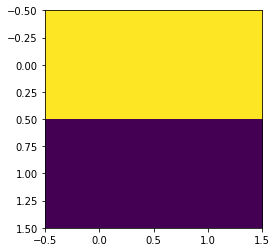

In [10]:
plt.imshow(i2)


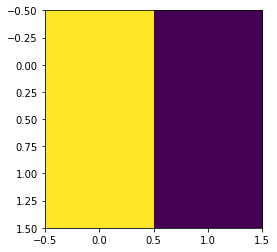

In [11]:
plt.imshow(i3)

Horizontal Kernel on Image 1
No Edge Detected
Vertical Kernel on Image 1
No Edge Detected


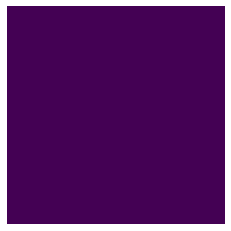

In [21]:
# We will detect PATTERNS here via KERNELS 
# KERNELs here mean matrices that will be multiplied or (any other ops) to original data

#  2  2   X    200  0   ->   2X200   2X0  -> 400  0 -> 400 + 0 -400 +0 -> 0 
# -2 -2        200  0       -2X200  -2X0    -400  0 
# HERE THER IS NO HORIZONTAL EDGE, but vertical edge
# if the reasult of the product was 0 -> we can conclude NO horizontal edge

k_horizontal = np.array([np.array([2,2]),np.array([-2,-2]) ]) # this will make results negative, and thus -> 0 
k_vertical = np.array([np.array([2,-2]),np.array([2,-2]) ]) # this will make results negative, and thus -> 0 
def applyKernel(img, kernel):
  return np.sum(np.multiply(img, kernel))  # DOT product 

found = lambda val: 'Edge Detected' if val>0 else 'No Edge Detected'


print('Horizontal Kernel on Image 1')
print(found(applyKernel(i1, k_horizontal)))
print('Vertical Kernel on Image 1')
print(found(applyKernel(i1, k_vertical)))
plt.axis('off')
plt.imshow(i1)

Horizontal Kernel on Image 2
Edge Detected
Vertical Kernel on Image 1
No Edge Detected


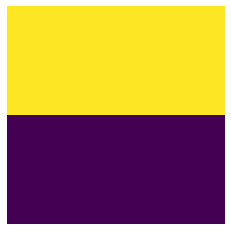

In [20]:
print('Horizontal Kernel on Image 2')
print(found(applyKernel(i2, k_horizontal)))
print('Vertical Kernel on Image 1')
print(found(applyKernel(i2, k_vertical)))
plt.axis('off')
plt.imshow(i2)
# NON ZERO VALUE -> EDGE DETECTED! 

Horizontal Kernel on Image 3
No Edge Detected
Vertical Kernel on Image 1
Edge Detected


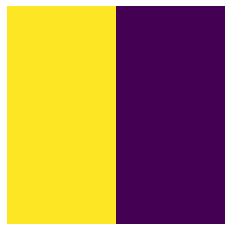

In [19]:
print('Horizontal Kernel on Image 3')
print(found(applyKernel(i3, k_horizontal)))
print('Vertical Kernel on Image 1')
print(found(applyKernel(i3, k_vertical)))
plt.axis('off')
plt.imshow(i3)
# VERTICAL EDGE DETECTED! 